In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('olx_house_price_Q122.csv')
df.head()

,offer_title,price,price_per_meter,offer_type,floor,area,rooms,offer_type_of_building,market,city_name,voivodeship,month,year,population,longitude,latitude
0,Kawalerka na sprzedaĹĽ,240000.0,8888.89,Private,1.0,27.00,1,Housing Block,primary,BolesĹ‚awiec,Lower Silesia,January,2022,39603,15.565105,51.263033
1,Nowoczesna kawalerka z winda plus garaĹĽ podzi...,250000.0,7142.86,Private,1.0,35.00,1,Housing Block,primary,Jelcz-Laskowice,Lower Silesia,January,2022,15828,17.349964,51.039831
2,Nowa kawalerka z Balkonem/Legnicka/Magnolia,259000.0,10360.00,Estate Agency,2.0,25.00,1,Housing Block,primary,WrocĹ‚aw,Lower Silesia,January,2022,634487,17.032669,51.108978
3,Kawalerka z balkonem/klucze I kwartaĹ‚ 2022/60...,269000.0,10275.02,Private,3.0,26.18,1,Apartment Building,primary,WrocĹ‚aw,Lower Silesia,January,2022,634487,17.032669,51.108978
4,40 tys. taniej od dewelopera/Kawalerka/Magnoli...,258000.0,9923.08,Estate Agency,3.0,26.00,1,Housing Block,primary,WrocĹ‚aw,Lower Silesia,January,2022,634487,17.032669,51.108978


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62818 entries, 0 to 62817
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   offer_title             62818 non-null  object 
 1   price                   62818 non-null  float64
 2   price_per_meter         62818 non-null  float64
 3   offer_type              62818 non-null  object 
 4   floor                   61331 non-null  float64
 5   area                    61331 non-null  float64
 6   rooms                   62818 non-null  int64  
 7   offer_type_of_building  61331 non-null  object 
 8   market                  62818 non-null  object 
 9   city_name               62818 non-null  object 
 10  voivodeship             62818 non-null  object 
 11  month                   62818 non-null  object 
 12  year                    62818 non-null  int64  
 13  population              62818 non-null  int64  
 14  longitude               62818 non-null

In [77]:
df.describe()

,price,price_per_meter,floor,area,rooms,year,population,longitude,latitude
count,6.281800e+04,6.281800e+04,61331.000000,61331.000000,62818.000000,62818.0,6.281800e+04,62818.000000,62818.000000
mean,3.994059e+05,7.596442e+03,2.399749,91.251837,2.515378,2022.0,3.149670e+05,19.161558,51.819109
std,2.023251e+06,3.656178e+04,2.150510,3153.663628,0.826473,0.0,4.543669e+05,2.139698,1.322616
min,1.000000e+00,2.000000e-02,-1.000000,1.000000,1.000000,2022.0,1.328000e+03,14.251070,49.296945
25%,2.600000e+05,5.250000e+03,1.000000,42.000000,2.000000,2022.0,3.396700e+04,17.565228,50.679307
50%,3.450000e+05,6.576845e+03,2.000000,51.200000,2.000000,2022.0,1.039970e+05,19.272156,51.768732
75%,4.600000e+05,8.766930e+03,3.000000,63.000000,3.000000,2022.0,4.024650e+05,20.930831,52.807175
max,5.041516e+08,9.002707e+06,11.000000,399000.000000,4.000000,2022.0,1.744351e+06,23.887382,54.790132


As we can see there is some outliers in our dataset. I gues that price 504mln PLN for 56mkw it's way too much

c:\Users\mreliga\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


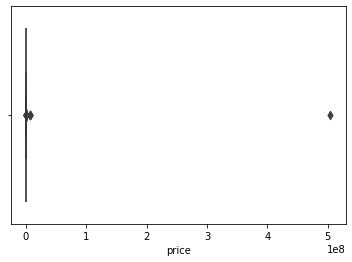

In [78]:
sns.boxenplot(df['price']);

In [79]:
print(f"quantile 0,15 from prices: {df['price'].quantile(0.15)}")
print(f"quantile 0,95 from prices: {df['price'].quantile(0.95)}")

quantile 0,15 from prices: 225000.0
quantile 0,95 from prices: 755000.0


In [80]:
df[df['price']==df['price'].max()]

,offer_title,price,price_per_meter,offer_type,floor,area,rooms,offer_type_of_building,market,city_name,voivodeship,month,year,population,longitude,latitude
36254,Okazja Pogodno 56 mkw z ogrĂłdkiem tylko u nas,504151616.0,9002707.43,Estate Agency,1.0,56.0,2,Housing Block,aftermarket,Szczecin,West Pomerania,February,2022,402465,14.550962,53.430182


Let's drop this 

In [81]:
df = df[df['price']!=df['price'].max()]

c:\Users\mreliga\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


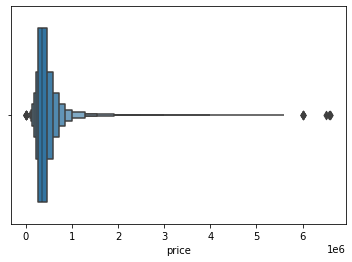

In [82]:
sns.boxenplot(df['price']);

In [83]:
df[df['price']!=df['price'].min()]

,offer_title,price,price_per_meter,offer_type,floor,area,rooms,offer_type_of_building,market,city_name,voivodeship,month,year,population,longitude,latitude
0,Kawalerka na sprzedaĹĽ,240000.0,8888.89,Private,1.0,27.00,1,Housing Block,primary,BolesĹ‚awiec,Lower Silesia,January,2022,39603,15.565105,51.263033
1,Nowoczesna kawalerka z winda plus garaĹĽ podzi...,250000.0,7142.86,Private,1.0,35.00,1,Housing Block,primary,Jelcz-Laskowice,Lower Silesia,January,2022,15828,17.349964,51.039831
2,Nowa kawalerka z Balkonem/Legnicka/Magnolia,259000.0,10360.00,Estate Agency,2.0,25.00,1,Housing Block,primary,WrocĹ‚aw,Lower Silesia,January,2022,634487,17.032669,51.108978
3,Kawalerka z balkonem/klucze I kwartaĹ‚ 2022/60...,269000.0,10275.02,Private,3.0,26.18,1,Apartment Building,primary,WrocĹ‚aw,Lower Silesia,January,2022,634487,17.032669,51.108978
4,40 tys. taniej od dewelopera/Kawalerka/Magnoli...,258000.0,9923.08,Estate Agency,3.0,26.00,1,Housing Block,primary,WrocĹ‚aw,Lower Silesia,January,2022,634487,17.032669,51.108978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62813,Mieszkanie 4-pokojowe 57m2 parter,230000.0,4035.09,Private,0.0,57.00,4,Housing Block,aftermarket,ZĹ‚ocieniec,West Pomerania,March,2022,13224,16.012066,53.531070
62814,Mieszkanie 4-pokojowe spĂłĹ‚dz. wĹ‚asnoĹ›Ä‡. z...,390000.0,5735.29,Private,1.0,68.00,4,Housing Block,aftermarket,Ĺobez,West Pomerania,March,2022,10438,15.621349,53.639119
62815,Mieszkanie z lokalem uĹĽytkowym,330000.0,2704.92,Private,1.0,122.00,4,Other,aftermarket,Ĺšwidwin,West Pomerania,March,2022,15725,15.777351,53.774704
62816,Mieszkanie 80m2 przy lesie,830000.0,10375.00,Private,1.0,80.00,4,Housing Block,aftermarket,ĹšwinoujĹ›cie,West Pomerania,March,2022,41371,14.251070,53.909748


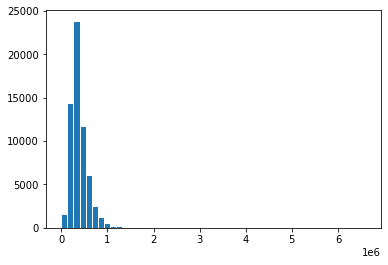

In [84]:
plt.hist(df['price'], bins=50, edgecolor='white');

In [85]:
df['price'].groupby(df['city_name']).mean()

city_name
AleksandrĂłw Kujawski    232681.818182
AleksandrĂłw ĹĂłdzki    304744.257143
Alwernia                 401500.000000
AndrychĂłw               353352.702703
AugustĂłw                418895.342466
                             ...      
Ĺšwiebodzice             220048.780488
Ĺšwiebodzin              343351.351351
Ĺšwiecie                 317590.000000
ĹšwinoujĹ›cie            607502.877698
ĹšwiÄ™tochĹ‚owice        228675.984000
Name: price, Length: 611, dtype: float64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62817 entries, 0 to 62817
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   offer_title             62817 non-null  object 
 1   price                   62817 non-null  float64
 2   price_per_meter         62817 non-null  float64
 3   offer_type              62817 non-null  object 
 4   floor                   61330 non-null  float64
 5   area                    61330 non-null  float64
 6   rooms                   62817 non-null  int64  
 7   offer_type_of_building  61330 non-null  object 
 8   market                  62817 non-null  object 
 9   city_name               62817 non-null  object 
 10  voivodeship             62817 non-null  object 
 11  month                   62817 non-null  object 
 12  year                    62817 non-null  int64  
 13  population              62817 non-null  int64  
 14  longitude               62817 non-null

In [87]:
df_mean_city = df.groupby('city_name', group_keys=True).mean()

In [88]:
df_mean_city[df_mean_city['price'] == df_mean_city['price'].max()]

,price,price_per_meter,floor,area,rooms,year,population,longitude,latitude
city_name,,,,,,,,,
Ĺeba,4044000.0,4294.192,1.8,896.38,4.0,2022.0,3824.0,17.555417,54.758521
